In [1]:
%matplotlib inline
import numpy as np

# Python in Astronomy

## Matplotlib

<center>
<code>何勃亮</code>
</center>
<center>
<code>中国科学院国家天文台 国家天文科学数据中心</code>
</center>

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%%HTML
<iframe width=100% height=600 src="http://matplotlib.org/gallery.html" ></iframe>

## 概念

**plt**

`import matplotlib.pyplot as plt`

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

- `Matplotlib` 整个包
- `pyplot` 集成了方便用户进行绘图的一系列指令
- `pylab` 集成导入了`pyplot`和`numpy`在同一命名空间，但官方已经不推荐使用这个方式了。

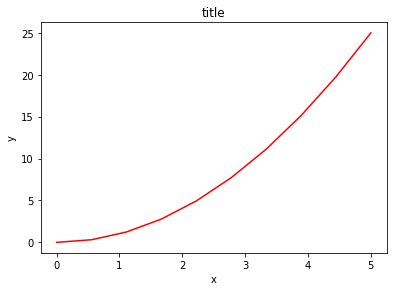

In [3]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Matplotlib 绘图步骤

1. 建立图像（`figure`）
2. 添加一个画布空间（`axes`）
3. 画图（`plot`）
4. 修改绘图参数（`label, title, etc`）

![](http://matplotlib.org/_images/fig_map.png)

### 代码范式

#### 1. 简单

```python
import matplotlib.pyplot as plt
import numpy as np

x = ...
y = ...

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()
```

#### 定义绘图函数

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

**调用模式 1**

```
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker':'x'})
```

**调用模式 2**

```
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker':'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})
```


In [5]:
print(plt.style.available)

['ggplot', 'seaborn-bright', 'bmh', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-dark', 'seaborn-white', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-notebook', 'classic', 'seaborn-pastel', 'dark_background', 'seaborn-deep', 'seaborn-muted', 'seaborn-poster', 'seaborn-talk', 'seaborn-paper', 'grayscale', 'seaborn-dark-palette', 'seaborn-ticks']


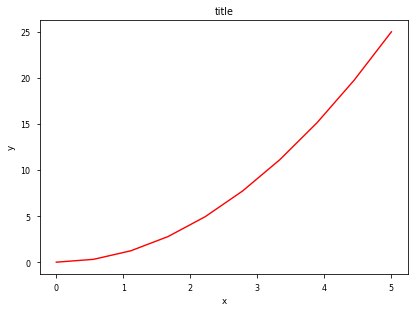

In [5]:
plt.style.use('seaborn-paper')

x = np.linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

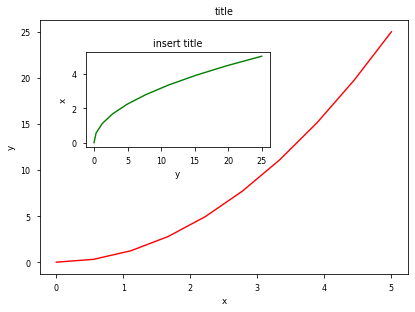

In [6]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

### 图像尺寸，比例和分辨率

In [9]:
# 800 x 400, 100dpi

fig = plt.figure(figsize=(8,4), dpi=100)

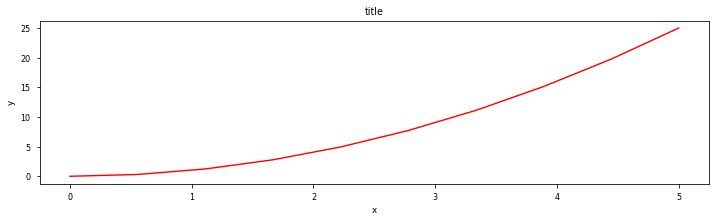

In [7]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

In [8]:
# 保存图像

fig.savefig("filename.png")

fig.savefig("filename200.png", dpi=200)

In [9]:
fig.savefig('filename.pdf')

### 图例，标题

In [12]:
ax.set_title("title");

In [13]:
ax.set_xlabel("x")
ax.set_ylabel("y");

In [14]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

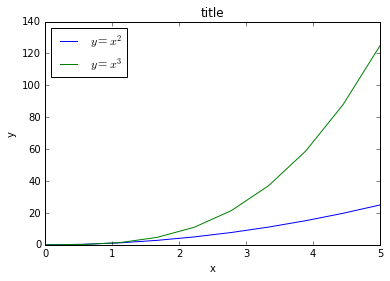

In [15]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x**3, label="$y = x^3$")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

In [16]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'FZGuLi-S12S'})

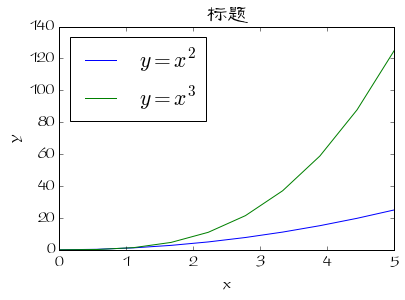

In [17]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x**3, label="$y = x^3$")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('标题');

In [18]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### 颜色，线宽，线型

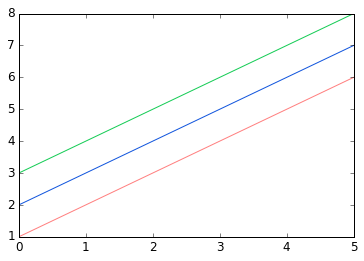

In [19]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

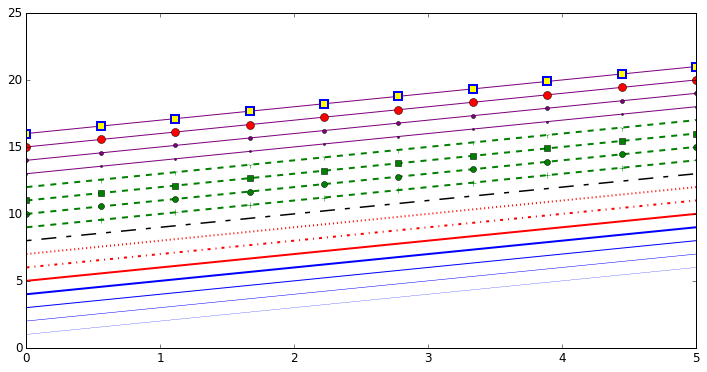

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### 坐标轴

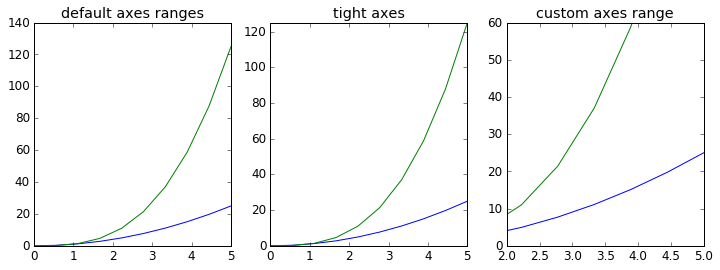

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

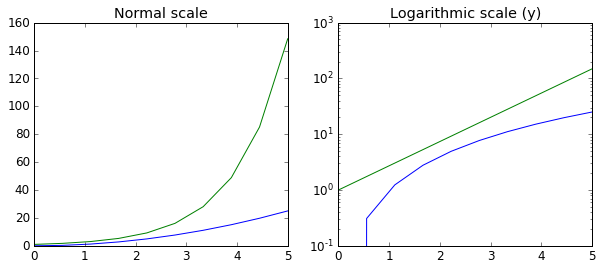

In [22]:
## Logarithmic scale

fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

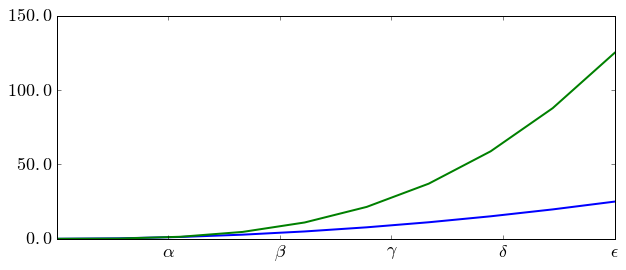

In [23]:
# 定制刻度显示

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

http://matplotlib.org/api/ticker_api.html

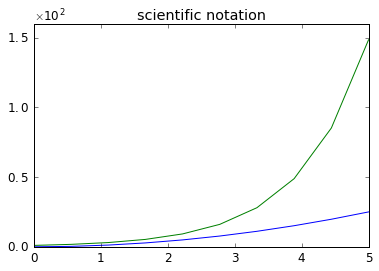

In [24]:
# 科学记数法

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

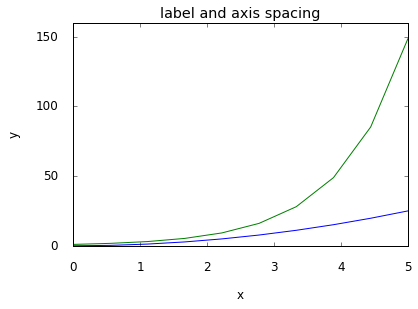

In [25]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 15
matplotlib.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.set_xlabel("x")
ax.set_ylabel("y");

In [26]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

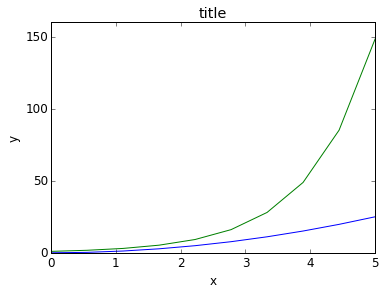

In [27]:
# Axis position adjustments

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

#### 网格


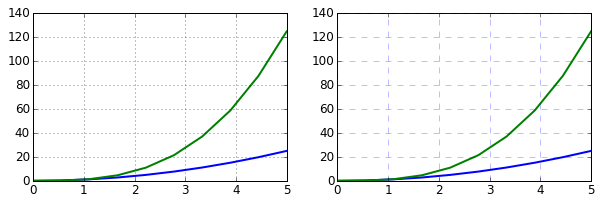

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#### 坐标轴颜色

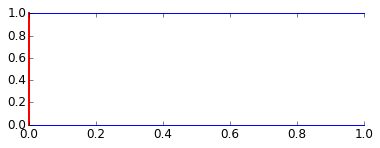

In [29]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

#### 双坐标轴

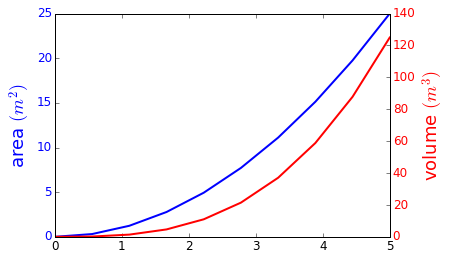

In [30]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### 去掉边框

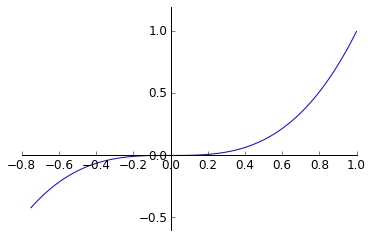

In [31]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### 各种图型

http://matplotlib.org/gallery.html

#### 散点图等

In [32]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D arra

In [33]:
help(plt.step)

Help on function step in module matplotlib.pyplot:

step(x, y, *args, **kwargs)
    Make a step plot.
    
    Call signature::
    
      step(x, y, *args, **kwargs)
    
    Additional keyword args to :func:`step` are the same as those
    for :func:`~matplotlib.pyplot.plot`.
    
    *x* and *y* must be 1-D sequences, and it is assumed, but not checked,
    that *x* is uniformly increasing.
    
    Keyword arguments:
    
    *where*: [ 'pre' | 'post' | 'mid'  ]
      If 'pre' (the default), the interval from x[i] to x[i+1] has level
      y[i+1].
    
      If 'post', that interval has level y[i].
    
      If 'mid', the jumps in *y* occur half-way between the
      *x*-values.
    
    Return value is a list of lines that were added.
    
    Notes
    -----
    
    In addition to the above described arguments, this function can take a
    **data** keyword argument. If such a **data** argument is given, the
    following arguments are replaced by **data[<arg>]**:
    
    * All

In [34]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

In [35]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, hold=None, data=None, **kwargs)
    Make filled polygons between two curves.
    
    
    Create a :class:`~matplotlib.collections.PolyCollection`
    filling the regions between *y1* and *y2* where
    ``where==True``
    
    Parameters
    ----------
    x : array
        An N-length array of the x data
    
    y1 : array
        An N-length array (or scalar) of the y data
    
    y2 : array
        An N-length array (or scalar) of the y data
    
    where : array, optional
        If `None`, default to fill between everywhere.  If not `None`,
        it is an N-length numpy boolean array and the fill will
        only happen over the regions where ``where==True``.
    
    interpolate : bool, optional
        If `True`, interpolate between the two lines to find the
        precise point of intersection.  Otherwise, the start and
        end points of t

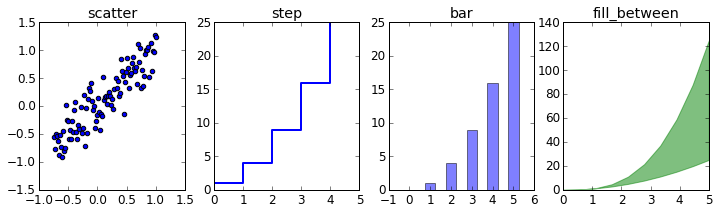

In [36]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

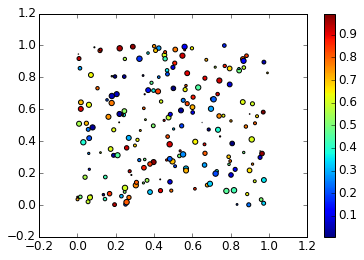

In [37]:
## Scatter 
fig, ax = plt.subplots(1, 1)
      
x = np.random.rand(200)
y = np.random.rand(200)

size = np.random.rand(200)*30
color = np.random.rand(200)

im = ax.scatter(x, y, size, color)
fig.colorbar(im,ax=ax)

#### 极坐标

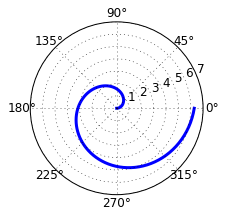

In [38]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

#### 直方图

In [39]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arrays 

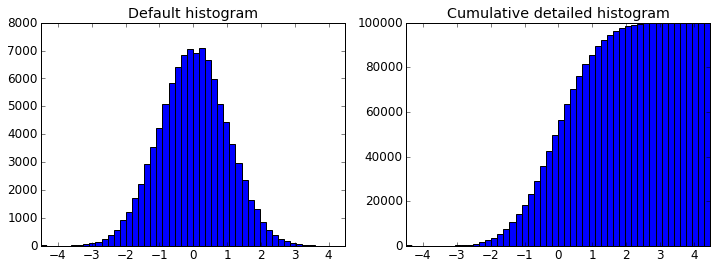

In [62]:
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n, bins=50)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### 文字标注

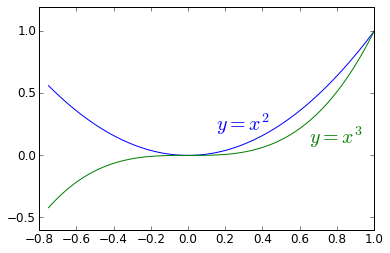

In [41]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### 多图模式

- subplot
- subplot2grid
- gridspec
- add_axes

#### subplot

In [42]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure with a set of subplots already made.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Keyword arguments:
    
      *nrows* : int
        Number of rows of the subplot grid.  Defaults to 1.
    
      *ncols* : int
        Number of columns of the subplot grid.  Defaults to 1.
    
      *sharex* : string or bool
        If *True*, the X axis will be shared amongst all subplots.  If
        *True* and you have multiple rows, the x tick labels on all but
        the last row of plots will have visible set to *False*
        If a string must be one of "row", "col", "all", or "none".
        "all" has the same effect as *True*, "none" has the same effect
        as *False*.
        If "row", eac

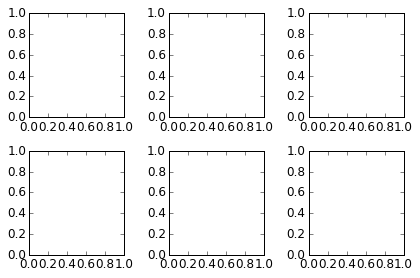

In [43]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

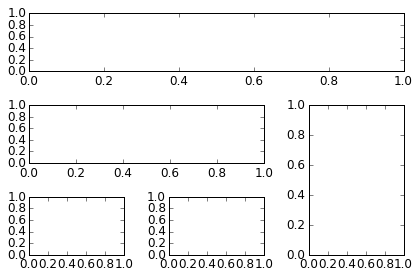

In [44]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [45]:
import matplotlib.gridspec as gridspec

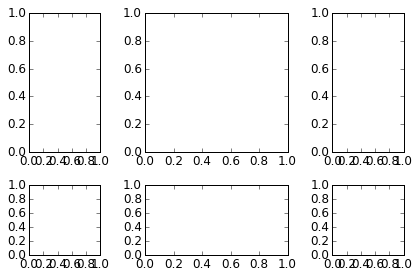

In [46]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### gridspec

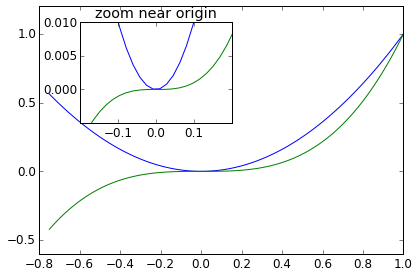

In [47]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### 颜色图和等高线图

http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [48]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [49]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

In [50]:
help(plt.pcolor)

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    .. note::
    
        pcolor can be very slow for large arrays; consider
        using the similar but much faster
        :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Call signatures::
    
      pcolor(C, **kwargs)
      pcolor(X, Y, C, **kwargs)
    
    *C* is the array of color values.
    
    *X* and *Y*, if given, specify the (*x*, *y*) coordinates of
    the colored quadrilaterals; the quadrilateral for C[i,j] has
    corners at::
    
      (X[i,   j],   Y[i,   j]),
      (X[i,   j+1], Y[i,   j+1]),
      (X[i+1, j],   Y[i+1, j]),
      (X[i+1, j+1], Y[i+1, j+1]).
    
    Ideally the dimensions of *X* and *Y* should be one greater
    than those of *C*; if the dimensions are the same, then the
    last row and column of *C* will be ignored.
    
    Note that the column index corresponds to the
    *x*-coordinate, and the row index 

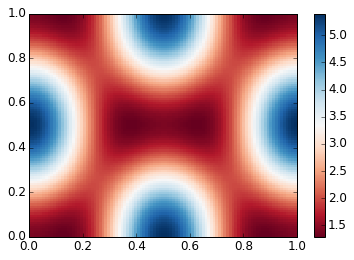

In [51]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

In [52]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`, optional, default: None
        If None, d

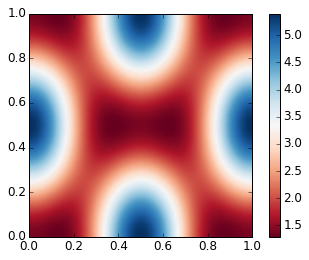

In [53]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

In [54]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour li

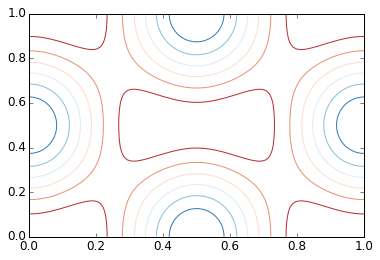

In [55]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### 3D

In [56]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plot

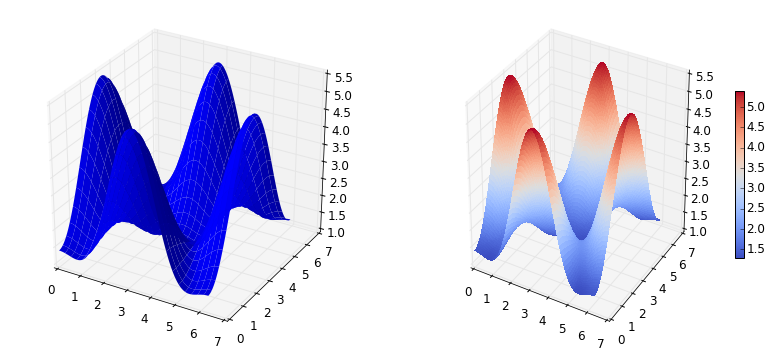

In [57]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

In [58]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
    
    The `rstride` and `cstride` kwargs set the stride used to
    sample the input data to generate the graph.  If 1k by 1k
    arrays are passed in the default values for the strides will
    result in a 100x100 grid being plotted.
    
    ============= ================================================
    Argument      Description
    ============= ================================================
    *X*, *Y*, *Z* Data values as 2D arrays
    *rstride*     Array row stride (step size), defaults to 10
    *cstride*     Array column stride (step size), defaults to 10
    *color*       Color of the surface patches
    *cmap*        A colormap for the 

#### Wire-frame plot

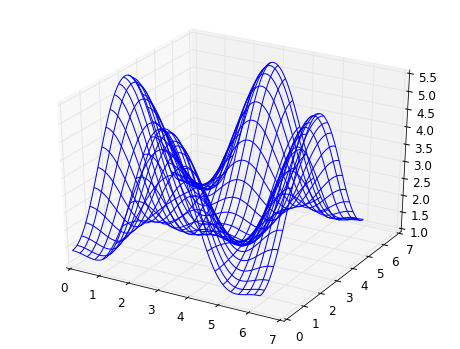

In [59]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### 复杂点的

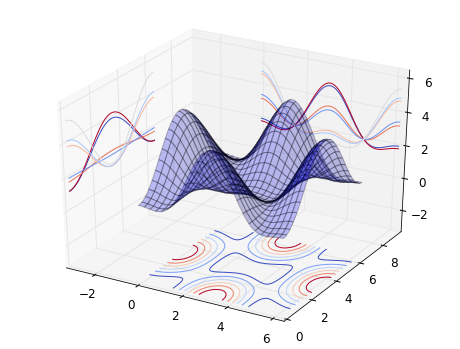

In [60]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### 换个角度

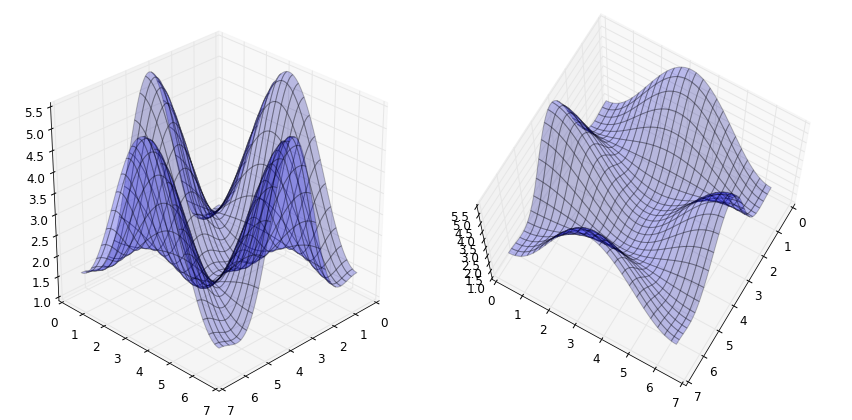

In [61]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## 重要参考

- [初学者指南](http://matplotlib.org/users/beginner.html)
- [高级指南](http://matplotlib.org/users/developer.html)